In [1]:
import numpy as np
import numpy.testing as npt
from scipy.linalg import expm
import matplotlib.pyplot as plt
from matplotlib.transforms import Affine2D
from matplotlib.collections import PatchCollection
import scipy.spatial, scipy.linalg
import scipy.sparse.linalg
from scipy.misc import logsumexp
from scipy.cluster.hierarchy import linkage, dendrogram
import itertools as it
from scipy.signal import correlate
import unittest
import scipy.linalg as la
import pylab as pl
import sheet3 as imp
%matplotlib inline

kernels = ['gaussian','polynomial','linear']
titles = ['gaussian','polynomial','linear']
params = [0.5,6,0]
regularizations = [ 0.01,0.01,0.01]


In [2]:
s = np.random.uniform(-1,0,10)
s

array([-0.63937407, -0.90109205, -0.16358813, -0.86980193, -0.35465344,
       -0.97925184, -0.94536063, -0.88840456, -0.5104303 , -0.09743162])

In [3]:
#method = cv(X, y, method, parameters, nfolds=10, nrepetitions=5, loss function)
def a(method):
    m = method(40)
    return m

In [4]:
class k():
    def __init__(self, param1):
        self.param1 = param1


In [5]:
b=a(k)

In [6]:
b.param1
1!=0

True

In [10]:
c= np.arange(10).reshape(10,1)*np.ones(3)
print(c)
X=c
nfolds=3
nrepetitions=5
y = np.arange(len(c))
print(y)

params = { 'kernel': ['gaussian'], 'kernelparameter': np.logspace(-4,4,20),'regularization': np.logspace(-2,2,10) }

[[ 0.  0.  0.]
 [ 1.  1.  1.]
 [ 2.  2.  2.]
 [ 3.  3.  3.]
 [ 4.  4.  4.]
 [ 5.  5.  5.]
 [ 6.  6.  6.]
 [ 7.  7.  7.]
 [ 8.  8.  8.]
 [ 9.  9.  9.]]
[0 1 2 3 4 5 6 7 8 9]


In [13]:
np.logspace(-2,2,10)

array([  1.00000000e-02,   2.78255940e-02,   7.74263683e-02,
         2.15443469e-01,   5.99484250e-01,   1.66810054e+00,
         4.64158883e+00,   1.29154967e+01,   3.59381366e+01,
         1.00000000e+02])

In [8]:
#method = cv(X, y, method, parameters, nfolds=10, nrepetitions=5, loss function)
def cv(X, y, method, parameters,loss_function,nfolds=10, nrepetitions=5):
    loss_function =0.
    n=len(X)
    d = len(X[0])
    e = n % nfolds
    div = n-e
    nom = int(div/nfolds)
    krr = method(params['kernel'],params['kernelparameter'],params['regularization'])
    for i in range(nrepetitions):
        partidx=np.append((np.ones((nfolds,nom))*np.arange(nom)).reshape(div),np.arange(e))
        np.random.shuffle(partidx)
        for j in range(nfolds):
            method.fit(X[np.where(partidx!=j)])
            yy=method.predict(X[np.where(partidx==j)])
            booly = (y==yy).astype(np.int64)
            loss_function = loss_function + booly.sum()/len(X[np.where(partidx==j)])
            
    loss_function = loss_function/(nfolds*nrepetitions)
    

In [9]:
krr = imp.krr(kernel=kernels[0], kernelparameter=params[0], regularization=regularizations[0])
loss_function = 0.
cv(X, y, krr, parameters,loss_function,nfolds=10, nrepetitions=5)

NameError: name 'parameters' is not defined

In [12]:
aa = np.array([[1,1,1,3,4,5],[1,1,1,3,4,5]])
nn = len(aa[0])
idxvor = -np.arange(nn/2)
idxvor=np.argsort(idxvor)
idxnach = -(np.arange(len(aa[0])/2)+1).astype(np.int64)
print(idxnach)
print(idxvor)
print(aa[:,idxnach])
aa = np.append(aa[:,idxvor],aa,1)
aa = np.append(aa,aa[:,idxnach],1)
print(aa)
bb = np.array([[1,2,3]])
cc = correlate(aa,bb,'same')
print(cc)
CC = cc[:,nn/2:(-nn/2)]
CC

[-1 -2 -3]
[2 1 0]
[[5 4 3]
 [5 4 3]]
[[1 1 1 1 1 1 3 4 5 5 4 3]
 [1 1 1 1 1 1 3 4 5 5 4 3]]
[[ 5  6  6  6  6 12 19 26 29 27 22 10]
 [ 5  6  6  6  6 12 19 26 29 27 22 10]]


/usr/local/lib/python3.5/dist-packages/ipykernel/__main__.py:15: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


array([[ 6,  6, 12, 19, 26, 29],
       [ 6,  6, 12, 19, 26, 29]])

In [13]:
combs = it.product([0,1],[2,3,4])

In [14]:
list(combs)

[(0, 2), (0, 3), (0, 4), (1, 2), (1, 3), (1, 4)]

In [15]:
a = [[0,1],[2,3,4]]
combs1 = it.product(a)
combs2 = it.product(*a)

In [16]:
b=list([np.array(a[0]),np.array(a[1])])

In [17]:
b.append([np.arange(10)])

In [18]:
print(b)


[array([0, 1]), array([2, 3, 4]), [array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])]]


In [19]:
c= np.arange(10).reshape(10,1)*np.ones(3)
print(c)
X=c
nfolds=3
nrepetitions=5
y = np.arange(len(c))
print(y)

[[ 0.  0.  0.]
 [ 1.  1.  1.]
 [ 2.  2.  2.]
 [ 3.  3.  3.]
 [ 4.  4.  4.]
 [ 5.  5.  5.]
 [ 6.  6.  6.]
 [ 7.  7.  7.]
 [ 8.  8.  8.]
 [ 9.  9.  9.]]
[0 1 2 3 4 5 6 7 8 9]


In [20]:
#method = cv(X, y, method, parameters, nfolds=10, nrepetitions=5, loss function)
n=len(X)
d = len(X[0])
e = n % nfolds
div = n-e
nom = int(div/nfolds)
#for i in range(nrepetitions):
idx =  np.random.choice(n, n, replace=False)
XX = X[idx]
yy = y[idx]
partx = list(XX[:div].reshape(nfolds,nom,d))
party = list(yy[:div].reshape(nfolds,nom))
if(e>0):
    for j in range(e):
        partx[j] = np.append(partx[j],XX[-j-1].reshape(1,d),0)
        party[j] = np.append(party[j],yy[-j-1])

In [21]:
partx

[array([[ 4.,  4.,  4.],
        [ 1.,  1.,  1.],
        [ 7.,  7.,  7.],
        [ 2.,  2.,  2.]]), array([[ 3.,  3.,  3.],
        [ 6.,  6.,  6.],
        [ 8.,  8.,  8.]]), array([[ 5.,  5.,  5.],
        [ 9.,  9.,  9.],
        [ 0.,  0.,  0.]])]

In [22]:
party

[array([4, 1, 7, 2]), array([3, 6, 8]), array([5, 9, 0])]

In [23]:
#method = cv(X, y, method, parameters, nfolds=10, nrepetitions=5, loss function)
n=len(X)
d = len(X[0])
e = n % nfolds
div = n-e
nom = int(div/nfolds)
#for i in range(nrepetitions):
partidx=np.append((np.ones((nfolds,nom))*np.arange(nom)).reshape(div),np.arange(e))
print(partidx)
np.random.shuffle(partidx)
print(partidx)


[ 0.  1.  2.  0.  1.  2.  0.  1.  2.  0.]
[ 2.  0.  0.  1.  0.  2.  0.  1.  1.  2.]


In [63]:
class KRR(): # KRR must be krr
    
    def __init__(self, kernel, kernelparameter, regularization):
        self.kernel = kernel
        self.kp = kernelparameter
        self.c = regularization

    def getkernel(self, X, Y=None):
        n= len(X)
        n2 = n
        if(Y==None):
            X2=np.array(X)
            x2=len(X2)
            n2 = n
        else: 
            X2 = Y
            n2 = len(X2)
            
        if(self.kernel =='gaussian'):
            w = self.kp
            X1 = (X**2).sum(1).reshape(n,1)*np.ones((n,n2))
            U1 = (X2**2).sum(1).reshape(1,n2) * np.ones([n,n2])
            D = X1 - 2*(X.dot(X2.T)) + U1
            K = np.exp(-D/(2*w**2))
        elif(self.kernel =='polynomial'):
            p= self.kp
            K = (np.dot(X,X2.T)+1)**p
        elif(self.kernel =='linear'):
            K = np.dot(X,X2.T)
        else:
            raise AssertionError("Choose from ['gaussian','polynomial','linear']")
        return K
    
    def fit(self, X, y):
        self.X_fit = X
        n= len(X)
        K = self.getkernel(X)
        self.K = K
        if(self.c==0):
            D, U =np.linalg.eigh(K)
            c = np.random.uniform(0.01,0.10,100)
            err = np.empty(len(c))
            for i in range(len(c)):
                LCI = np.diag(D)+c[i]*np.eye(n)
                LCI_inv=np.linalg.solve(LCI,np.eye(n))
                S = np.dot(np.dot(np.dot(U,np.diag(D)),LCI_inv),U.T)
                UY = np.dot(U.T,y)
                SY = np.dot(np.dot(np.dot(U,np.diag(D)),LCI_inv),UY)
                err[i] = (((y-SY)/(1-np.diag(S)))**2).mean(0)
            cidx=np.argmin(err)
            self.c = c[cidx]
        print(self.c)
        
        KK = self.K + self.c *np.eye(n)
        inv = np.linalg.solve(KK,np.eye(n))
        self.alpha= np.dot(inv,y.reshape(n,1))
        
    def predict(self, X):
        K = self.getkernel(X, self.X_fit)
        return np.dot(K, self.alpha)


In [64]:
def noisysincfunction(N, noise):
    ''' noisysincfunction - generate data from the "noisy sinc function"
        % usage
        %     [X, Y] = noisysincfunction(N, noise)
        %
        % input
        %     N: number of data points
        %     noise: standard variation of the noise
        %
        % output
        %     X: (1, N)-matrix uniformly sampled in -2pi, pi
        %     Y: (1, N)-matrix equal to sinc(X) + noise
        %
        % description
        %     Generates N points from the noisy sinc function
        %
        %        X ~ uniformly in [-2pi, pi]
        %        Y = sinc(X) + eps, eps ~ Normal(0, noise.^2)
        %
        % author
        %     Mikio Braun
    '''
    X = np.sort(2 * np.pi * np.random.rand(1, N) ) - np.pi
    Y = np.sinc(X) + noise * np.random.randn(1, N)
    return X.reshape(-1, 1), Y.flatten()

def test_krr(KRR):
    '''
        tests the class krr
    '''
    Xtr, Ytr = noisysincfunction(100, 0.1)
    Xte = np.arange( -np.pi, np.pi, 0.01 ).reshape(-1, 1)

    pl.figure()
    kernels = ['gaussian','polynomial','linear']
    titles = ['gaussian','polynomial','linear']
    params = [0.5,6,0]
    regularizations = [ 0.01,0.01,0.01]
    for i in range(3):
        for j in range(2):
            pl.subplot(2,3,1+i+3*j)
            if j==0:
                krr = KRR(kernel=kernels[i],
                        kernelparameter=params[i],
                        regularization=regularizations[i])
                krr.fit(Xtr,Ytr)
            if j==1:
                krr = KRR(kernel=kernels[i],
                        kernelparameter=params[i],
                        regularization=0)
                krr.fit(Xtr,Ytr)
            ypred = krr.predict(Xte)
            print(ypred.mean(0))
            pl.plot(Xtr,Ytr)
            pl.plot(Xte,ypred)
            if j==0 and i == 0:
                pl.ylabel('fixed regularization')
            if j==1 and i == 0:
                pl.ylabel('reg. by efficent cv')
            pl.title( titles[i] )
    pl.show()
    print(Xtr.shape)
    print(Ytr.shape)
    print(Xte.shape)

0.01
[ 0.17892003]


/usr/local/lib/python3.5/dist-packages/ipykernel/__main__.py:11: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.


0.0995426467834
[ 0.17732376]
0.01
[ 0.16596799]
0.0984870403592
[ 0.16527489]
0.01
[ -9.48397513e-06]
0.0993463404149
[ -9.48137526e-06]


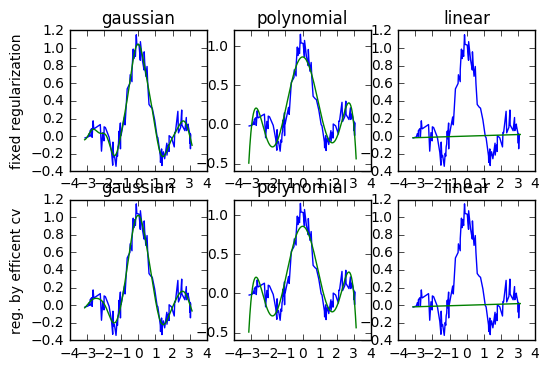

(100, 1)
(100,)
(629, 1)


In [65]:
test_krr(KRR)

In [116]:
np.eye(3).dot(np.ones((3,1)))

array([[ 1.],
       [ 1.],
       [ 1.]])

In [7]:
c= np.arange(9).reshape(9,1)*np.ones(3)
print(c)

[[ 0.  0.  0.]
 [ 1.  1.  1.]
 [ 2.  2.  2.]
 [ 3.  3.  3.]
 [ 4.  4.  4.]
 [ 5.  5.  5.]
 [ 6.  6.  6.]
 [ 7.  7.  7.]
 [ 8.  8.  8.]]


In [8]:
# reshape(m,num of menbers,dimension)
newc=c.reshape(3,3,3)
print(newc)
#+extra

[[[ 0.  0.  0.]
  [ 1.  1.  1.]
  [ 2.  2.  2.]]

 [[ 3.  3.  3.]
  [ 4.  4.  4.]
  [ 5.  5.  5.]]

 [[ 6.  6.  6.]
  [ 7.  7.  7.]
  [ 8.  8.  8.]]]


In [9]:
lis= list(newc)

In [10]:
lis[0] = np.append(lis[0],np.array([[1,2,3]]),0)

In [11]:
lis[0]

array([[ 0.,  0.,  0.],
       [ 1.,  1.,  1.],
       [ 2.,  2.,  2.],
       [ 1.,  2.,  3.]])

In [12]:
lis

[array([[ 0.,  0.,  0.],
        [ 1.,  1.,  1.],
        [ 2.,  2.,  2.],
        [ 1.,  2.,  3.]]), array([[ 3.,  3.,  3.],
        [ 4.,  4.,  4.],
        [ 5.,  5.,  5.]]), array([[ 6.,  6.,  6.],
        [ 7.,  7.,  7.],
        [ 8.,  8.,  8.]])]

In [14]:
list(np.array([[1,2,3],[4,6,7],[12,13,14]]))

[array([1, 2, 3]), array([4, 6, 7]), array([12, 13, 14])]

In [169]:
combs = it.product([0,1],[2,3,4])

In [170]:
cmb = list(combs)
print(cmb)

[(0, 2), (0, 3), (0, 4), (1, 2), (1, 3), (1, 4)]


In [172]:
len(cmb)

6

In [175]:
a = np.array([[1,2,3],[4,5,6],[7,8,9]])
b = np.array([[1,2]]).reshape(2,1)
print(a)
print(b)

[[1 2 3]
 [4 5 6]
 [7 8 9]]
[[1]
 [2]]


In [176]:
combs = list(it.product(a,b))
print(combs)

[(array([1, 2, 3]), array([1])), (array([1, 2, 3]), array([2])), (array([4, 5, 6]), array([1])), (array([4, 5, 6]), array([2])), (array([7, 8, 9]), array([1])), (array([7, 8, 9]), array([2]))]


In [180]:
np.array(combs)

array([[array([1, 2, 3]), array([1])],
       [array([1, 2, 3]), array([2])],
       [array([4, 5, 6]), array([1])],
       [array([4, 5, 6]), array([2])],
       [array([7, 8, 9]), array([1])],
       [array([7, 8, 9]), array([2])]], dtype=object)

In [181]:
np.array(combs)[:,0]*np.array(combs)[:,1]

array([array([1, 2, 3]), array([2, 4, 6]), array([4, 5, 6]),
       array([ 8, 10, 12]), array([7, 8, 9]), array([14, 16, 18])], dtype=object)

In [182]:
(np.array(combs)[:,0]*np.array(combs)[:,1]).sum(0)

array([36, 45, 54])

In [183]:
(np.array(combs)[:,0]*np.array(combs)[:,1]).sum(0)*len(b)/len(combs)

array([ 12.,  15.,  18.])